<a href="https://colab.research.google.com/github/chenglifang/chenglifang.github.io/blob/master/QSAR_tutorial_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 22.3 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors

In [ ]:
!pip install numpy

In [ ]:
pip install joblib

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
pip install scikit-learn==1.6.1

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef
import joblib

# Reading molecules and activity from SDF

In [ ]:
from google.colab import files
uploaded = files.upload()
# This code allows you to upload files from your local machine to Colab for subsequent file reading.

fname = "logBB.sdf"
# Assign the value "data/logBB.sdf" to the variable fname,
# or name the data "data/logBB.sdf" as fname,
# or put the data "data/logBB.sdf" into a box named fname.

# When processing chemical data, molecular objects and their corresponding labels are usually stored in mols and y, respectively, in a one-to-one manner.
mols = []
# Create an empty list and assign it to the variable mols.
# [] is used to define a list, which is a mutable and ordered data structure.
# In the field of chemoinformatics, especially when using tools like RDKit, mols is typically used to store a list of molecular objects.
# For example, when reading molecules from a file using RDKit, each molecular object can be added to the mols list for further processing.

y = []
# Create an empty list and assign it to the variable y.
# y is typically used to store the bioactivity values or other related properties of molecules.

for mol in Chem.SDMolSupplier(fname):
# Chem.SDMolSupplier(fname) is a function in the RDKit library
# is used to read molecular data from a specified SDF (Structure-Data File).
# This function returns an iterator, allowing sequential access to each molecule in the file.
    if mol is not None: # Check if the variable mol is not None
      # The append method in this context is used to add a new element to each respective list, allowing for subsequent processing or analysis.
        mols.append(mol) # Add the current molecule object mol to the end of the mols list
        y.append(mol.GetIntProp("logBB_class"))
        # Call the GetIntProp method on the molecule object mol and retrieve its "logBB_class" property value.
        # append that integer value to the y list

Saving logBB.sdf to logBB.sdf


[00:20:16] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
[00:20:16] ERROR: Could not sanitize molecule ending on line 3192
[00:20:16] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
[00:20:16] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[00:20:16] ERROR: Could not sanitize molecule ending on line 4541
[00:20:16] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[00:20:16] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[00:20:16] ERROR: Could not sanitize molecule ending on line 5314
[00:20:16] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[00:20:16] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 14 15 16 17 18
[00:20:16] ERROR: Could not sanitize molecule ending on line 7252
[00:20:16] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 14 15 16 17 18
[00:20:16] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 11 12 13 14 15
[00:20:16] ERROR

Molecular fingerprints: These are bit vectors that represent molecular structural features and are used to calculate molecular similarity.

Converting to a NumPy array: The descriptors or fingerprints are converted into a NumPy array format, making it easier for numerical computations and machine learning modeling in Python.

Call the Chem.SDMolSupplier(fname) function to iterate through each molecule object mol and its feature information in the SDF file fname. Use indexing to view each molecule object and its feature information.

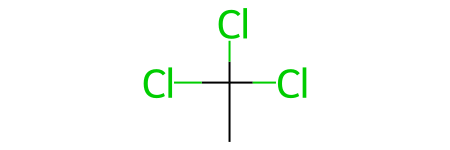

In [ ]:
supplier=Chem.SDMolSupplier(fname)
mol=supplier[0]
mol

View the length of the list mols, which contains the molecule objects and their corresponding feature information, to check the number of molecule objects in the list.

In [ ]:
len(mols)

299

Print the list mols.
Print the SMILES format using the following method:

In [ ]:
for mol in mols:
    smiles = Chem.MolToSmiles(mol)  # Convert the Mol object to a SMILES string
    print(smiles)

CC(Cl)(Cl)Cl
ClCC(Cl)Cl
FC(F)=CCl
CCCCO
CCC(C)=O
C=COC=C
CCOCC
CC(C)CO
COC(C)=O
ClCC(Cl)(Cl)Cl
CCCCCO
CCC(C)(C)C
CCCC(C)C
CCCC(C)=O
CCC(C)CC
CCC(C)(C)O
c1ccccc1
C1CCCCC1
CCOC(C)=O
CC1CCCC1
CN1CCN2c3ccccc3Cc3ccccc3C2C1
Cc1ncc2n1-c1ccc(Cl)cc1C(c1ccccc1F)=NC2
COn1cc(C(=O)O)c(=O)c2cc3c(cc21)OCO3
CN1CCN2c3ncccc3Cc3ccccc3C2C1
CN1CCC23c4c5ccc(O)c4OC2C(O)C=CC3C1C5
Cc1cccc(C)c1
[H]/N=C(\N)Nc1nc(-c2ccccc2)cs1
CN(C)CCc1ccccn1
CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21
Cc1c(O)cccc1C(=O)NC(CSc1ccccc1)C(O)CN1CC2CCCCC2CC1C(=O)NC(C)(C)C
Cc1ccnc2c1NC(=O)c1cccnc1N2C1CC1
CCCCCC
CN1CCCC1c1cccnc1
CN1CN(c2ccccc2)C2(CCN(CCCC(=O)c3ccc(F)cc3)CC2)C1=O
CCCCCCCCC
CNCCCN1c2ccccc2Sc2ccc(Cl)cc21
O=C1CC(=O)N(c2ccccc2)c2cc(Cl)ccc2N1
O=C1CN=C(c2ccccc2)c2cc(Cl)ccc2N1
c1cncc(C2CCCN2)c1
CSc1ccc2c(c1)N(CCC1CCCNC1)c1ccccc1S2
COc1ccc(CCNCCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C)cc1OC
CCC1(C)C(=O)NC(=O)NC1=O
CCCCCCCC
Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1
Clc1ccc2c(c1)C1CNCC1c1ccccc1O2
CN1CC2c3ccccc3Oc3ccc(Cl)cc3C2C1
CCCCCCC1(CC)C(=O)NC(=O)NC1=O
O=

View the value of the "logBB_class" feature information for each molecule object in the list y using indexing.

In [ ]:
y[1]

0

In [ ]:
y

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,


# Calculate descriptors (fingerprints) and convert them into numpy array

In [ ]:
# generate binary Morgan fingerprint with radius 2
fp = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mols]

[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerator
[00:20:29] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
def rdkit_numpy_convert(fp): # Define a function using the def keyword, where fp is the function parameter
    output = []
    for f in fp:
        arr = np.zeros((1,)) # Create a NumPy array of length 1 initialized to 0 using the zeros
        DataStructs.ConvertToNumpyArray(f, arr)
        # Use the RDKit function DataStructs.ConvertToNumpyArray to convert the molecular fingerprint f into a NumPy array, and store the result in the previously created array arr.
        output.append(arr) # Add the converted array arr to the output list
    return np.asarray(output) # # Convert the output list to a NumPy array and return it
    # asarray is a function provided by NumPy, used to convert input data into a NumPy array (ndarray)

In Python, def is a keyword used to define a function. By using def, you can create a function that encapsulates a group of statements so that it can be called multiple times when needed.

rdkit_numpy_convert is a custom function name and is not a built-in Python function. From its name, it is likely used to convert molecular fingerprints generated by RDKit into NumPy arrays for further computation and analysis.

In [ ]:
x = rdkit_numpy_convert(fp)
# Call the custom function rdkit_numpy_convert, where fp is the function's parameter. Convert fp into a NumPy array and assign the result to x

In [ ]:
x.shape # Get the shape information of the NumPy array x.

(299, 2048)

shape is an attribute of a NumPy array used to get the dimension information of the array.

x.shape returns a tuple that represents the size of the array in each dimension. For example, for a two-dimensional array, shape returns (number of rows, number of columns).

In [ ]:
# check wether the data set is balanced
sum(y) / len(y)

0.5886287625418061

This line of code calculates the proportion of positive samples in the label array y, i.e., the proportion of positive samples (also called the positive class frequency). In binary classification problems, 1 is typically used to represent the positive class, and 0 represents the negative class.

sum(y): Calculates the total sum of all elements in the array y. Since the elements of y are typically 0 or 1 (with 1 representing the positive class and 0 representing the negative class), sum(y) equals the number of positive samples.

len(y): Retrieves the length of the array y, which is the total number of samples.

sum(y) / len(y): Calculates the proportion of positive samples, i.e., the number of positive samples divided by the total number of samples.

# Set random seed to make all further calculations reproducible

In [ ]:
seed = 42

# Split the whole set on training and test sets

In [ ]:
# randomly select 20% of compounds as test set
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.20, random_state=seed)

# Create folds for cross-validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # cross-validation

In [ ]:
# print out ids of folds
for i, (train_index, test_index) in enumerate(cv.split(x_tr, y_tr)):
    print("\nFold_" + str(i+1))
    print("TRAIN:", train_index)
    print("TEST:", test_index)


Fold_1
TRAIN: [  0   1   2   4   5   6   8   9  10  11  12  16  19  20  23  24  25  26
  27  30  31  32  33  34  36  38  39  40  41  42  44  45  47  48  49  50
  51  52  53  55  56  58  59  60  61  62  64  65  66  67  68  69  70  72
  75  76  77  78  79  80  83  84  85  86  87  88  89  91  92  93  94  95
  96  97  99 100 102 103 104 105 106 107 108 109 110 111 113 114 115 116
 117 118 119 121 122 123 126 127 128 129 130 132 133 134 137 138 139 140
 141 142 143 144 145 146 147 149 150 151 152 153 154 155 156 157 158 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 175 176 179 180 182
 183 184 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 208 209 210 212 213 214 215 216 218 219 220 221 222 223
 226 227 228 229 230 233 234 235 236 237 238]
TEST: [  3   7  13  14  15  17  18  21  22  28  29  35  37  43  46  54  57  63
  71  73  74  81  82  90  98 101 112 120 124 125 131 135 136 148 159 174
 177 178 181 185 186 207 211 217 224 225 231 232]

Fold_2

# **Scale X**

This step may be crucial for certain modeling approaches lke SVM. In the case of binary fingerprints it may be less useful.

In [ ]:
# obtain scale object which can be further applied to scale any data to fit the training set
scale = StandardScaler().fit(x_tr) # Get a StandardScaler object that can be used to scale any data to the same distribution as the training set
# StandardScaler()：Create a StandardScaler object
# .fit(x_tr)：Calculate the mean and standard deviation of the training data x_tr and store these statistics in the StandardScaler object
x_tr = scale.transform(x_tr) # Transform the training data using the calculated mean and standard deviation
# .transform(x_tr)：Use the previously calculated mean and standard deviation to transform the training data x_tr into a standard normal distribution, i.e., making the mean of each feature 0 and the standard deviation 1.

In [ ]:
# it is a good idea to save it for future use
import joblib
joblib.dump(scale, "logBB_scale.pkl", compress=3)

['logBB_scale.pkl']

# Search for optimal tuning parameters and build the model
使用网格搜索字典进行超参数优化

In [ ]:
# create grid search dictionary
param_grid = {"max_features": [x_tr.shape[1] // 10, x_tr.shape[1] // 7, x_tr.shape[1] // 5, x_tr.shape[1] // 3],
              "n_estimators": [100, 250, 500]}
# Define the hyperparameter search space.

In [ ]:
# setup model building  Create a GridSearchCV for hyperparameter search.
m = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=2, cv=cv, verbose=1)
#Use Grid Search to perform hyperparameter optimization on RandomForestClassifier and search for the best parameter combination in parallel

In [ ]:
# run model building # Train the grid search.
m.fit(x_tr, y_tr)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_features': [204, 292, 409, 682],
                         'n_estimators': [100, 250, 500]},
             verbose=1)

In [ ]:
m.best_params_

{'max_features': 204, 'n_estimators': 250}

In [ ]:
m.best_score_

np.float64(0.7699468085106382)

In [ ]:
m.cv_results_

{'mean_fit_time': array([0.88215442, 1.29012599, 2.41227927, 0.57401705, 1.83516402,
        2.69872942, 0.6790823 , 1.9830976 , 4.87316685, 1.42536502,
        4.37366047, 4.75711017]),
 'std_fit_time': array([0.13148285, 0.11636599, 0.03484734, 0.03521702, 0.40353149,
        0.03958642, 0.12729664, 0.44113687, 1.66752249, 0.22038896,
        0.78300161, 0.97080751]),
 'mean_score_time': array([0.02347312, 0.03227739, 0.06185021, 0.01687169, 0.0437449 ,
        0.06599908, 0.01672363, 0.03573251, 0.11881814, 0.02804747,
        0.05481644, 0.05468216]),
 'std_score_time': array([0.00860641, 0.000645  , 0.00124869, 0.00401902, 0.01989808,
        0.00574004, 0.00515417, 0.00836061, 0.0466418 , 0.00727125,
        0.02311372, 0.0113337 ]),
 'param_max_features': masked_array(data=[204, 204, 204, 292, 292, 292, 409, 409, 409, 682, 682,
                    682],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
  

In [ ]:
m.cv_results_['mean_test_score']

array([0.74902482, 0.76994681, 0.76578014, 0.76152482, 0.76578014,
       0.75328014, 0.76152482, 0.75744681, 0.76985816, 0.74485816,
       0.75319149, 0.76152482])

In [ ]:
m.cv_results_['params']

[{'max_features': 204, 'n_estimators': 100},
 {'max_features': 204, 'n_estimators': 250},
 {'max_features': 204, 'n_estimators': 500},
 {'max_features': 292, 'n_estimators': 100},
 {'max_features': 292, 'n_estimators': 250},
 {'max_features': 292, 'n_estimators': 500},
 {'max_features': 409, 'n_estimators': 100},
 {'max_features': 409, 'n_estimators': 250},
 {'max_features': 409, 'n_estimators': 500},
 {'max_features': 682, 'n_estimators': 100},
 {'max_features': 682, 'n_estimators': 250},
 {'max_features': 682, 'n_estimators': 500}]

# Save model

In [ ]:
joblib.dump(m, "logBB_rf_morgan.pkl", compress=3)
# joblib.dump()：Used to save an object (such as a trained model) to a file so that it can be loaded and used later without having to retrain the model
# m：The object to be saved is usually a trained machine learning model (e.g., RandomForestRegressor() or GridSearchCV)
# "logBB_rf_morgan.pkl"：The saved file path, with the file format being .pkl (Pickle format), represents a Python serialized object
# compress=3：An optional parameter that represents the compression level

['logBB_rf_morgan.pkl']

# Predict test set compounds

In [ ]:
# load scale if necessary # Load the saved model
scale = joblib.load("logBB_scale.pkl")

In [ ]:
# scale descriptors of the test set compounds
x_ts = scale.transform(x_ts)

In [ ]:
# predict logBB class
pred_rf = m.predict(x_ts)

In [ ]:
pred_rf

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# calc statistics for test set preditions
# 计算不同评估指标

In [ ]:
accuracy_score(y_ts, pred_rf)
# Calculate the classification accuracy

0.75

In [ ]:
y_ts

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1]

In [ ]:
matthews_corrcoef(y_ts, pred_rf)
# Calculate the Matthews correlation coefficient (MCC)

np.float64(0.4671198287892241)

In [ ]:
cohen_kappa_score(y_ts, pred_rf)
# Calculate Cohen's Kappa score

np.float64(0.466824644549763)

# applicability domain estimates

In [ ]:
# if the model includes several ones like RF models or consensus models (or for probabilistic models)
# we can calculate consistency of predictions amongs those models and use it for estimation of applicability domain
pred_prob = m.predict_proba(x_ts)
# predict_proba is a method of scikit-learn classification models that returns the probability of each input sample x_ts belonging to each class.
# x_ts is the test data (which can be a NumPy array or a Pandas DataFrame).

In [ ]:
# probablity
pred_prob

array([[0.612, 0.388],
       [0.668, 0.332],
       [0.592, 0.408],
       [0.196, 0.804],
       [0.04 , 0.96 ],
       [0.892, 0.108],
       [0.312, 0.688],
       [0.464, 0.536],
       [0.148, 0.852],
       [0.772, 0.228],
       [0.496, 0.504],
       [0.58 , 0.42 ],
       [0.7  , 0.3  ],
       [0.516, 0.484],
       [0.168, 0.832],
       [0.032, 0.968],
       [0.08 , 0.92 ],
       [0.864, 0.136],
       [0.34 , 0.66 ],
       [0.556, 0.444],
       [0.08 , 0.92 ],
       [0.548, 0.452],
       [0.784, 0.216],
       [0.016, 0.984],
       [0.   , 1.   ],
       [0.344, 0.656],
       [0.44 , 0.56 ],
       [0.528, 0.472],
       [0.468, 0.532],
       [0.692, 0.308],
       [0.008, 0.992],
       [0.36 , 0.64 ],
       [0.784, 0.216],
       [0.408, 0.592],
       [0.084, 0.916],
       [0.244, 0.756],
       [0.016, 0.984],
       [0.328, 0.672],
       [0.012, 0.988],
       [0.9  , 0.1  ],
       [0.04 , 0.96 ],
       [0.952, 0.048],
       [0.204, 0.796],
       [0.0

In [ ]:
# setup threshold
threshold = 0.8
# In classification problems, setting a threshold is primarily used to determine the decision boundary for the prediction results.
# For example, in a binary classification problem, the predict_proba method returns the probability of a certain class, and we can set a threshold to decide the final classification result.

In [ ]:
# calc maximum predicted probability for each row (compound) and compare to the threshold
da = np.amax(pred_prob, axis=1) > threshold

In [ ]:
da

array([False, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True, False,  True])

In [ ]:
# calc statistics
accuracy_score(np.asarray(y_ts)[da], pred_rf[da])
# accuracy_score is a function in the scikit-learn library that calculates the accuracy of a classification task

0.9642857142857143

In [ ]:
np.asarray(y_ts)[da]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1])

In [ ]:
pred_rf[da]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1])

In [ ]:
pred_rf

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
matthews_corrcoef(np.asarray(y_ts)[da], pred_rf[da])

np.float64(0.9045340337332909)

In [ ]:
cohen_kappa_score(np.asarray(y_ts)[da], pred_rf[da])

np.float64(0.9)

In [ ]:
# calc coverage
sum(da) / len(da)

np.float64(0.4666666666666667)

# Build SVM model

In [ ]:
# create grid search dictionary
param_grid = {"C": [10 ** i for i in range(0, 5)],
              "gamma": [10 ** i for i in range(-6, 0)]}

In [ ]:
# setup model building
svm = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, n_jobs=2, cv=cv, verbose=1)

In [ ]:
# run model building
svm.fit(x_tr, y_tr)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(probability=True), n_jobs=2,
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]},
             verbose=1)

In [ ]:
svm.best_score_

np.float64(0.7571808510638297)

In [ ]:
svm.best_params_

{'C': 1000, 'gamma': 1e-06}

In [ ]:
# save model
joblib.dump(svm, "logBB_svm_morgan.pkl", compress=3)

['logBB_svm_morgan.pkl']

In [ ]:
# predict logBB for the test set compounds
pred_svm = svm.predict(x_ts)

In [ ]:
pred_svm

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
# calc statistics
print("Accuracy = ", accuracy_score(y_ts, pred_svm))
print("MCC = ", matthews_corrcoef(y_ts, pred_svm))
print("Kappa = ", cohen_kappa_score(y_ts, pred_svm))

Accuracy =  0.7666666666666667
MCC =  0.49760765550239233
Kappa =  0.4976076555023924


In [ ]:
# estimate applicability domain and calc stat
pred_prob = svm.predict_proba(x_ts)

In [ ]:
da = np.amax(pred_prob, axis=1) > threshold

In [ ]:
print("Accuracy = ", accuracy_score(np.asarray(y_ts)[da], pred_svm[da]))
print("MCC = ", matthews_corrcoef(np.asarray(y_ts)[da], pred_svm[da]))
print("Kappa = ", cohen_kappa_score(np.asarray(y_ts)[da], pred_svm[da]))
print("Coverage = ", sum(da) / len(da))

Accuracy =  0.8285714285714286
MCC =  0.648649304898973
Kappa =  0.6440677966101696
Coverage =  0.5833333333333334


# build the third model (GBM) compute consensus predictions from RF, and SVM models

In [ ]:
# setup model building
param_grid = {"n_estimators": [100, 200, 300, 400, 500]}
gbm = GridSearchCV(GradientBoostingClassifier(subsample=0.5, max_features=0.5),
                   param_grid, n_jobs=2, cv=cv, verbose=1)

In [ ]:
# run model building
gbm.fit(x_tr, y_tr)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(max_features=0.5,
                                                  subsample=0.5),
             n_jobs=2, param_grid={'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [ ]:
gbm.best_score_

np.float64(0.786613475177305)

In [ ]:
gbm.best_params_

{'n_estimators': 200}

In [ ]:
pred_gbm = gbm.predict(x_ts)

In [ ]:
# calc statistics
print("Accuracy = ", accuracy_score(y_ts, pred_gbm))
print("MCC = ", matthews_corrcoef(y_ts, pred_gbm))
print("Kappa = ", cohen_kappa_score(y_ts, pred_gbm))

Accuracy =  0.7666666666666667
MCC =  0.5083042452524145
Kappa =  0.5070422535211268


# consensus model

In [ ]:
pred_c = 1 * (((pred_rf + pred_svm + pred_gbm) / 3) >= 0.5)

In [ ]:
pred_c

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
# calc statistics
print("Accuracy = ", accuracy_score(y_ts, pred_c))
print("MCC = ", matthews_corrcoef(y_ts, pred_c))
print("Kappa = ", cohen_kappa_score(y_ts, pred_c))

Accuracy =  0.75
MCC =  0.47937644619880754
Kappa =  0.4767441860465117


# Add to Morgan fingerprints some other descriptors and look at the model performance

In [ ]:
# calc some descriptors
descr = []
for m in mols:
    descr.append([Descriptors.MolLogP(m),
                  Descriptors.TPSA(m),
                  Descriptors.NHOHCount(m),
                  Descriptors.NOCount(m),
                  Descriptors.NumHAcceptors(m),
                  Descriptors.NumHDonors(m),
                  Descriptors.NumRotatableBonds(m),
                  Descriptors.NumHeteroatoms(m),
                  Descriptors.FractionCSP3(m)])
descr = np.asarray(descr)

In [ ]:
descr.shape

(299, 9)

In [ ]:
# add them to morgan fingerprints
x = np.concatenate((x, descr), axis=1)

In [ ]:
x.shape

(299, 2057)

In [ ]:
# randomly select 20% of compounds as test set
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.20, random_state=seed)

In [ ]:
scale = StandardScaler().fit(x_tr)
x_tr = scale.transform(x_tr)

In [ ]:
# create grid search dictionary
param_grid = {"max_features": [x_tr.shape[1] // 10, x_tr.shape[1] // 7, x_tr.shape[1] // 5, x_tr.shape[1] // 3],
              "n_estimators": [100, 250, 500]}

In [ ]:
# setup model building
m = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=2, cv=cv, verbose=1)

In [ ]:
# run model building
m.fit(x_tr, y_tr)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_features': [205, 293, 411, 685],
                         'n_estimators': [100, 250, 500]},
             verbose=1)

In [ ]:
m.best_score_

np.float64(0.8076241134751774)

In [ ]:
# scale descriptors of the test set compounds
x_ts = scale.transform(x_ts)

In [ ]:
# predict logBB for the test set compounds
pred = m.predict(x_ts)

In [ ]:
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
# calc statistics
print("Accuracy = ", accuracy_score(y_ts, pred))
print("MCC = ", matthews_corrcoef(y_ts, pred))
print("Kappa = ", cohen_kappa_score(y_ts, pred))

Accuracy =  0.8333333333333334
MCC =  0.6494998689336408
Kappa =  0.647887323943662


In [ ]:
# estimate applicability domain and calc stat
pred_prob = m.predict_proba(x_ts)

In [ ]:
da = np.amax(pred_prob, axis=1) > threshold

In [ ]:
print("Accuracy = ", accuracy_score(np.asarray(y_ts)[da], pred[da]))
print("MCC = ", matthews_corrcoef(np.asarray(y_ts)[da], pred[da]))
print("Kappa = ", cohen_kappa_score(np.asarray(y_ts)[da], pred[da]))
print("Coverage = ", sum(da) / len(da))

Accuracy =  0.8857142857142857
MCC =  0.753330178128478
Kappa =  0.7472924187725631
Coverage =  0.5833333333333334


# Let's try to analyse which variables are the most important in the model

In [ ]:
# rebuild RF model manually using best parameters to be able to extract additional information from the model
rf = RandomForestClassifier(n_estimators=m.best_params_["n_estimators"],
                           max_features=m.best_params_["max_features"],
                           random_state=seed)
rf.fit(x_tr, y_tr)

RandomForestClassifier(max_features=685, n_estimators=250, random_state=42)

In [ ]:
imp = rf.feature_importances_

In [ ]:
imp

array([0.        , 0.000499  , 0.0001802 , ..., 0.01233662, 0.01726729,
       0.03425527])

In [ ]:
indices = np.argsort(imp)[::-1]
# np.argsort() is a sorting function provided by NumPy that returns the indices of the elements sorted in ascending order, rather than the sorted values.
# The slicing operation [::-1] is used to reverse the order of the array.
# Since np.argsort(imp) generates indices in ascending order, applying [::-1] changes the order to descending indices.

print("Feature ranking:")

# print top 10 features
for i in range(10):
    print("%d. feature %d (%f)" % (i + 1, indices[i], imp[indices[i]]))

Feature ranking:
1. feature 2049 (0.172537)
2. feature 2048 (0.080151)
3. feature 2051 (0.059104)
4. feature 650 (0.035906)
5. feature 2056 (0.034255)
6. feature 2052 (0.027882)
7. feature 807 (0.019083)
8. feature 2055 (0.017267)
9. feature 2054 (0.012337)
10. feature 794 (0.011984)
